In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
%matplotlib inline

In [14]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Statistics/london.csv', sep=',', parse_dates=['timestamp']) 

### Проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

#### Сначала посмотрим на число поездок по датам и времени. Постройте график, где:

- по оси x – дата (timestamp) 
- по оси y – число поездок (cnt)

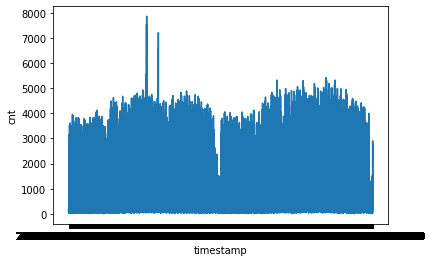

In [3]:
sns.lineplot(x='timestamp', y='cnt', data=df)

### Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

Ответ:
- Максимальное число аренд за день составляет более 70 000
- Встречаются как очень резкие скачки числа аренд, так и падения
- Зимой число аренд меньше, чем летом

In [15]:
df['timestamp'] = df.timestamp.sort_values()

In [20]:
df = df.set_index('timestamp')

In [37]:
df_travel = df.resample('D').agg({'cnt':'sum'})
df_travel

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601
...,...
2016-12-30,11566
2016-12-31,11424
2017-01-01,6421


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text major ticklabel objects>)

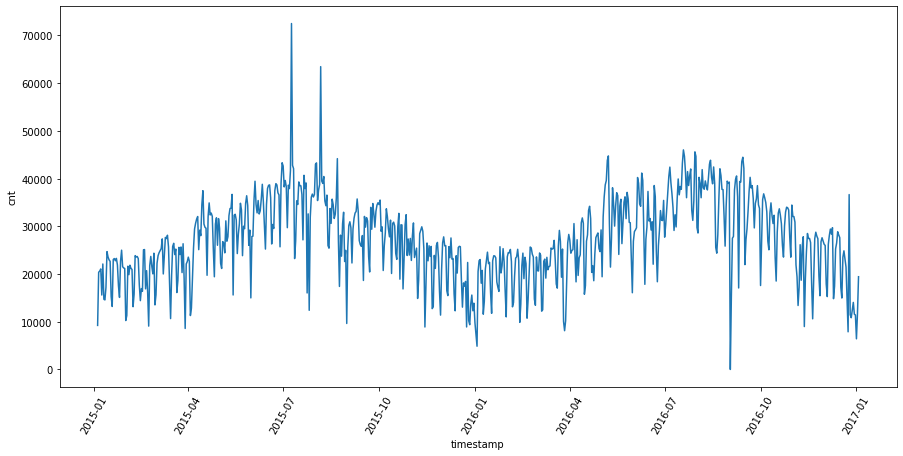

In [39]:
fig = plt.figure(figsize = (15, 7))
sns.lineplot(x='timestamp', y='cnt', data=df_travel)
plt.xticks(fontsize = 10, rotation = 60)

### Возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

Ответ: 50705

In [45]:
df_travel['window_mean'] = df_travel.rolling(window=3).mean()
df_travel.head()

,cnt,window_mean
timestamp,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667


In [46]:
df_travel.query('timestamp == "2015-07-09"')

,cnt,window_mean
timestamp,,
2015-07-09,72504,50705.0


### Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения.

В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.
Ответ: 4558.59

In [55]:
se = df_travel.cnt - df_travel.window_mean
std = np.std(se).round(2)
std

4558.59

### Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

- upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
- lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.
Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки. Ответ: 24302.92

In [56]:
df_travel.head()

,cnt,window_mean
timestamp,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667


In [67]:
df_travel['upper_bound'] = df_travel.window_mean + (2.576 * std)
df_travel['lower_bound'] = df_travel.window_mean - (2.576 * std)

In [68]:
df_travel

,cnt,window_mean,upper_bound,lower_bound
timestamp,,,,
2015-01-04,9234,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN
2015-01-06,20613,16739.666667,28482.594507,4996.738827
2015-01-07,21064,20683.000000,32425.927840,8940.072160
2015-01-08,15601,19092.666667,30835.594507,7349.738827
...,...,...,...,...
2016-12-30,11566,12682.000000,24424.927840,939.072160
2016-12-31,11424,12347.333333,24090.261173,604.405493
2017-01-01,6421,9803.666667,21546.594507,-1939.261173


### Bыведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим?
Ответ: 2015-07-09

In [106]:
df_travel['comparison_more'] = df_travel.cnt > df_travel.upper_bound

In [107]:
df_travel.comparison_more.sort_values(ascending=False)

timestamp
2015-07-09     True
2016-09-04     True
2016-12-25     True
2015-08-06     True
2017-01-03    False
              ...  
2016-05-01    False
2016-04-30    False
2016-04-29    False
2016-04-28    False
2015-01-04    False
Name: comparison_more, Length: 731, dtype: bool

In [108]:
df_travel.query('timestamp in ("2015-07-09", "2016-09-04", "2016-12-25", "2015-08-06")')

,cnt,window_mean,upper_bound,lower_bound,comparison,comparison_more
timestamp,,,,,,
2015-07-09,72504,50705.000000,62447.927840,38962.072160,True,True
2015-08-06,63468,46627.333333,58370.261173,34884.405493,True,True
2016-09-04,27512,14259.000000,26001.927840,2516.072160,True,True
2016-12-25,36653,19650.666667,31393.594507,7907.738827,True,True


In [109]:
df_travel.query('comparison_more == True')

,cnt,window_mean,upper_bound,lower_bound,comparison,comparison_more
timestamp,,,,,,
2015-07-09,72504,50705.000000,62447.927840,38962.072160,True,True
2015-08-06,63468,46627.333333,58370.261173,34884.405493,True,True
2016-09-04,27512,14259.000000,26001.927840,2516.072160,True,True
2016-12-25,36653,19650.666667,31393.594507,7907.738827,True,True


### Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка. Ответ: 
- В этот день была забастовка в Лондоне. https://rg.ru/2015/07/09/london-site-anons.html

In [110]:
df.query('timestamp in ("2015-07-09", "2016-09-04", "2016-12-25", "2015-08-06")')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
2015-08-06,430,17.5,17.5,75.0,7.5,1.0,0.0,0.0,1.0
2016-09-04,416,19.0,19.0,88.0,19.0,2.0,0.0,1.0,2.0
2016-12-25,207,11.0,11.0,77.0,35.0,3.0,0.0,1.0,3.0


### Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. 
В чем может быть причина падения числа аренд 2016-09-02? 
Ответ: 
- Т.к. в этот день (2016-09-02) не было совершенно ни одной аренды велосипеда, то можно сделать вывод о том что в данные закралась ошибка.

In [114]:
df_travel['comparison_less'] = df_travel.cnt < df_travel.lower_bound

In [115]:
df_travel.query('comparison_less == True')

,cnt,window_mean,upper_bound,lower_bound,comparison,comparison_more,comparison_less
timestamp,,,,,,,
2015-05-14,15609,28709.333333,40452.261173,16966.405493,False,False,True
2015-07-12,23240,36036.666667,47779.594507,24293.738827,False,False,True
2015-07-24,16034,31013.666667,42756.594507,19270.738827,False,False,True
2015-08-24,17400,29529.333333,41272.261173,17786.405493,False,False,True
2015-11-14,8898,21037.333333,32780.261173,9294.405493,False,False,True
2016-09-02,0,26086.333333,37829.261173,14343.405493,False,False,True
2016-09-10,17080,31262.000000,43004.927840,19519.072160,False,False,True
2016-09-16,21967,36193.333333,47936.261173,24450.405493,False,False,True
2016-11-12,8990,20878.000000,32620.927840,9135.072160,False,False,True
